# A/B Test Challenge



---

#### What is an A/B Test? 

It is a decision making support & research methodology that allow you to measure an impact of a change in a product (e.g.: a digital product). For this challenge you will analyse the data resulting of an A/B test performed on a digital product where a new set of sponsored ads are included.


#### Measure of success

Metrics are need it to measure the success of your product. They are typically split in the following categories: 

- __Enganged based metrics:__ number of users, number of downloads, number of active users, user retention, etc.

- __Revenue and monetization metrics:__ ads and affiliate links, subscription-based, in-app purchases, etc.

- __Technical metrics:__ service level indicators (uptime of the app, downtime of the app, latency).



---

## Metrics understanding

In this part you must analyse the metrics involved in the test. We will focus in the following metrics:

- Activity level + Daily active users (DAU).

- Click-through rate (CTR)

### Activity level

In the following part you must perform every calculation you consider necessary in order to answer the following questions:

- How many activity levels you can find in the dataset (Activity level of zero means no activity).

- What is the amount of users for each activity level.

- How many activity levels do you have per day and how many records per each activity level.

At the end of this section you must provide your conclusions about the _activity level_ of the users.

__Dataset:__ `activity_pretest.csv`

In [2]:
# imports

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.stats.weightstats import ztest
from scipy import stats


In [3]:

# your-code

activity_pretest_path = './data/activity_pretest.csv'
activity_pretest = pd.read_csv(activity_pretest_path)

display(len(activity_pretest['activity_level'].unique()))
display(len(activity_pretest['userid'].unique()))

activity_levels = activity_pretest.groupby(by=['activity_level']).nunique().reset_index()
#activity_levels['activity'] = ["no activity" if i == 0 else "activity" for i in activity_levels['activity_level']]
#activity_levels = activity_levels.groupby(by=['activity']).sum().reset_index()
#activity_levels['proportions'] = [i/sum(activity_levels['userid']) for i in activity_levels['userid']]
activity_levels

activity_levels_per_day = activity_pretest.groupby(by=['dt','activity_level']).count().reset_index()
activity_levels_per_day = activity_levels_per_day.groupby(by=['dt']).count().reset_index()
activity_levels_per_day

21

60000

,dt,activity_level,userid
0,2021-10-01,21,21
1,2021-10-02,21,21
2,2021-10-03,21,21
3,2021-10-04,21,21
4,2021-10-05,21,21
5,2021-10-06,21,21
6,2021-10-07,21,21
7,2021-10-08,21,21
8,2021-10-09,21,21
9,2021-10-10,21,21


### Daily active users (DAU)

![ab_test](./img/user_activity_ab_testing.JPG)


The daily active users (DAU) refers to the amount of users that are active per day (activity level of zero means no activity). You must perform the calculation of this metric and provide your insights about it.

__Dataset:__ `activity_pretest.csv`

,userid,activity_level
count,31.000000,31.000000
mean,30673.387097,30673.387097
std,90.968375,90.968375
min,30489.000000,30489.000000
25%,30608.000000,30608.000000
50%,30661.000000,30661.000000
75%,30728.500000,30728.500000
max,30902.000000,30902.000000


userid            30661.0
activity_level    30661.0
dtype: float64

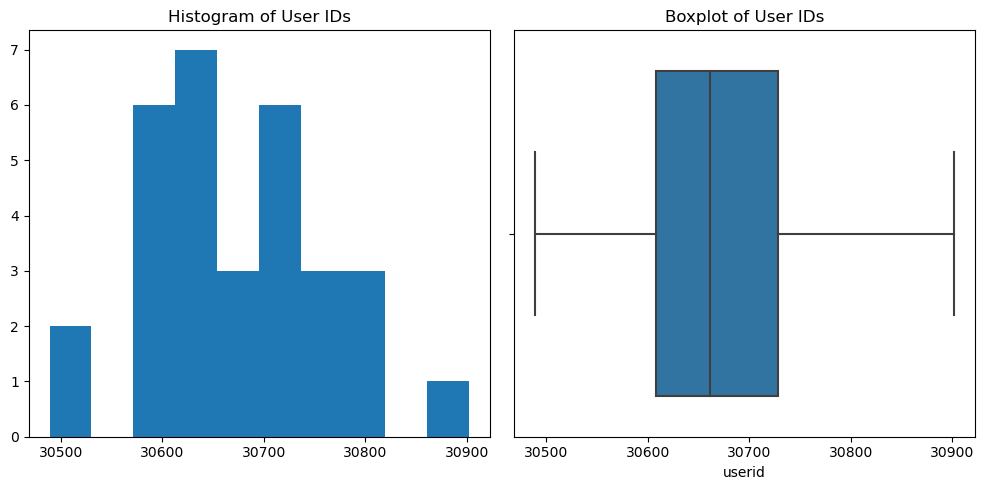

In [4]:
# your-code

dau = activity_pretest[activity_pretest['activity_level'] > 0]
dau = dau.groupby(by=['dt']).count().reset_index()

display(dau.describe())
display(dau.median(numeric_only=True))


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(dau['userid'])
axes[0].set_title('Histogram of User IDs')
sns.boxplot(x=dau['userid'], ax=axes[1])
axes[1].set_title('Boxplot of User IDs')
plt.tight_layout()
plt.show()

### Click-through rate (CTR)

![ab_test](./img/ad_click_through_rate_ab_testing.JPG)

Click-through rate (CTR) refers to the percentage of clicks that the user perform from the total amount ads showed to that user during a certain day. You must perform the analysis of this metric (e.g.: average CTR per day) and provide your insights about it.

__Dataset:__ `ctr_pretest.csv`

In [5]:
# your-code

ctr_pretest_path = './data/ctr_pretest.csv'
ctr_pretest = pd.read_csv(ctr_pretest_path)
ctr_pretest.info()

display(ctr_pretest.groupby(by=['dt']).mean(numeric_only=True).reset_index())
display(ctr_pretest.groupby(by=['dt']).mean(numeric_only=True).reset_index().describe())

display(ctr_pretest.groupby(by=['userid']).mean(numeric_only=True).reset_index())
display(ctr_pretest.groupby(by=['userid']).mean(numeric_only=True).reset_index().describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950875 entries, 0 to 950874
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userid  950875 non-null  object 
 1   dt      950875 non-null  object 
 2   ctr     950875 non-null  float64
dtypes: float64(1), object(2)
memory usage: 21.8+ MB


,dt,ctr
0,2021-10-01,32.993446
1,2021-10-02,32.991664
2,2021-10-03,32.995086
3,2021-10-04,32.992995
4,2021-10-05,33.004375
5,2021-10-06,33.018564
6,2021-10-07,32.988500
7,2021-10-08,32.998654
8,2021-10-09,33.005082
9,2021-10-10,33.007134


,ctr
count,31.000000
mean,33.000243
std,0.009372
min,32.984093
25%,32.992329
50%,33.001511
75%,33.006915
max,33.018564


,userid,ctr
0,0002a1ca-0b76-41cd-91e6-9aa51947b7fc,32.826429
1,00037d4d-ebfa-4a99-9d3e-adbefd6dae3a,32.511500
2,0004c8bb-df77-43b2-a93c-7398e9bc5175,33.472500
3,00051943-ca03-49d2-aafc-138439e5459c,32.270000
4,0007262b-b62e-447a-9021-232ad25df9ed,33.185714
...,...,...
59995,fff8c764-169f-4ee0-92f3-4d858a485d5c,33.118750
59996,fffb68bd-be7f-48e4-80bb-41f7354983ca,32.355333
59997,fffd73e1-a42e-49cb-9b17-1c5aae62ab46,32.810000
59998,fffdf2f8-7f61-4fb3-b5fc-6323a72290a7,33.468824


,ctr
count,60000.000000
mean,33.000737
std,0.444001
min,31.091818
25%,32.702857
50%,32.998750
75%,33.299286
max,35.695000


In [6]:
merged = pd.merge(ctr_pretest, activity_pretest, on='userid')
merged = merged.loc[:,['userid','ctr','activity_level']]
merged


,userid,ctr,activity_level
0,4b328144-df4b-47b1-a804-09834942dce0,34.28,0
1,4b328144-df4b-47b1-a804-09834942dce0,34.28,0
2,4b328144-df4b-47b1-a804-09834942dce0,34.28,0
3,4b328144-df4b-47b1-a804-09834942dce0,34.28,0
4,4b328144-df4b-47b1-a804-09834942dce0,34.28,0
...,...,...,...
29477120,a1f50d42-abe5-4354-a220-9fe4a8a8c498,30.47,5
29477121,a1f50d42-abe5-4354-a220-9fe4a8a8c498,30.47,11
29477122,a1f50d42-abe5-4354-a220-9fe4a8a8c498,30.47,12
29477123,a1f50d42-abe5-4354-a220-9fe4a8a8c498,30.47,16


---

## Pretest metrics 

In this section you will perform the analysis of the metrics using the dataset that includes the result for the test and control groups, but only for the pretest data (i.e.: prior to November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups prior to the start of the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [7]:
activity_all_path = './data/activity_all.csv'
activity_all = pd.read_csv(activity_all_path)

ctr_all_path = './data/ctr_all.csv'
ctr_all = pd.read_csv(ctr_all_path)

In [8]:
# your-code

# datasets pretest

activity_all_pre = activity_all[activity_all['dt'] < '2021-11-01']
ctr_all_pre = ctr_all[ctr_all['dt'] < '2021-11-01']

In [9]:
# DAU

dau_pre = activity_all_pre[activity_all_pre['activity_level'] > 0]
dau_pre_c = dau_pre[dau_pre['groupid'] == 0] 
dau_pre_c = dau_pre_c.groupby(by=['dt']).count().reset_index()
dau_pre_e = dau_pre[dau_pre['groupid'] == 1]
dau_pre_e = dau_pre_e.groupby(by=['dt']).count().reset_index()

dau_hypothesis_mean = dau_pre_c['userid'].mean()
print(dau_hypothesis_mean)
dau_sample_mean = dau_pre_e['userid'].mean()
print(dau_sample_mean)

# Z-TEST

z_score, p_value = ztest(dau_pre_e['userid'], dau_pre_c['userid'])
print(f'z_score: {z_score}', f'\np-value: {p_value}')

if p_value < 0.05:
    print('Significant change in DAU')
else:
    print('Not significant change in DAU')

# T-TEST

t_score, p_value = stats.ttest_ind(dau_pre_c['userid'], dau_pre_e['userid'])
print(f't_score: {t_score}', f'\np-value: {p_value}')

if p_value < 0.05:
    print('Significant change in DAU')
else:
    print('Not significant change in DAU')


15320.870967741936
15352.516129032258
z_score: 1.4121065242323187 
p-value: 0.15791859802311015
Not significant change in DAU
t_score: -1.4121065242323185 
p-value: 0.1630842353828084
Not significant change in DAU


In [10]:
# CTR

ctr_pre_c = ctr_all_pre[ctr_all_pre['groupid'] == 0]
ctr_pre_c = ctr_pre_c.groupby(by=['dt']).mean(numeric_only=True).reset_index()
ctr_pre_e = ctr_all_pre[ctr_all_pre['groupid'] == 1]
ctr_pre_e = ctr_pre_e.groupby(by=['dt']).mean(numeric_only=True).reset_index()

ctr_hypothesis_mean = ctr_pre_c['ctr'].mean()
print(ctr_hypothesis_mean)
ctr_sample_mean = ctr_pre_e['ctr'].mean()
print(ctr_sample_mean)

# Z-TEST

z_score, p_value = ztest(ctr_pre_e['ctr'], ctr_pre_c['ctr'])
print(f'z_score: {z_score}', f'\np-value: {p_value}')

if p_value < 0.05:
    print('Significant change in CTR')
else:
    print('Not significant change in CTR')

# T-TEST

t_score, p_value = stats.ttest_ind(a=ctr_pre_c['ctr'], b=ctr_pre_e['ctr'])
print(f't_score: {t_score}', f'\np-value: {p_value}')

if p_value < 0.05:
    print('Significant change in CTR')
else:
    print('Not significant change in CTR')

33.00093853567254
32.999576637260105
z_score: -0.3813635623232328 
p-value: 0.7029334947610391
Not significant change in CTR
t_score: 0.38136356232323276 
p-value: 0.7042806645803739
Not significant change in CTR


---

## Experiment metrics 

In this section you must perform the same analysis as in the previous section, but using the data generated during the experiment (i.e.: after November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups during the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [11]:
# your-code
df_aa = pd.read_csv("./data/activity_all.csv")
df_ca = pd.read_csv("./data/ctr_all.csv")

In [12]:
df_aa

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0
...,...,...,...,...
3659995,f0126b50-ad74-4480-9250-41b50a408932,2021-11-30,0,20
3659996,6ffe1efe-2e5d-427f-95ff-cc862c46c798,2021-11-30,1,20
3659997,f2073207-25dd-4127-a893-b70106d5ead7,2021-11-30,0,20
3659998,0416f2be-3ab8-481b-873c-3678b4705ecf,2021-11-30,1,20


In [13]:
df_ca

,userid,dt,groupid,ctr
0,60389fa7-2d71-4cdf-831c-c2bb277ffa1e,2021-11-13,0,31.81
1,b59cb225-d160-4851-92d2-7cc8120a2f63,2021-11-13,0,30.46
2,aa336050-934e-453f-a5b0-dd881fcd114e,2021-11-13,0,34.25
3,8df767f4-a10f-4322-a722-676b7e02b372,2021-11-13,0,34.92
4,a74762ed-4da0-42ab-91d2-40d7e808dfe9,2021-11-13,0,34.95
...,...,...,...,...
2303403,932e0348-ea2d-4b98-8782-aa84420f0796,2021-11-12,1,37.27
2303404,6775a825-6d3d-4dc3-9335-cad061736752,2021-11-12,1,39.14
2303405,a7b55365-21f1-4123-b2b5-485a8c7b98da,2021-11-12,1,40.05
2303406,a6fa937c-6f40-4f04-b15b-f1de09e179db,2021-11-12,1,38.14


---